1) Resolver la versión no lineal $(x^3)$ del oscilador armónico, usando su propio código.

En un oscilador armónico lineal, la fuerza $F$ es proporcional a la posición $x$, y sigue la ley de Hooke ($F=-kx$). La ecuación de movimiento es $ \frac{d^2 x}{dt^2}+ w_0 ^2 x =0 $

Para el oscilador armónico no lineal con fuerza proporcional a $x^3$, las ecuaciones que lo describen son: 
$$F=-k x^3$$
$$\frac{d^2 x}{dt^2}+ w_0 ^2 x^3 =0 $$

El movimiento del oscilador es complejo. Para resolver la ecuación de movimiento de segundo orden lo transformamos en un sistema de dos ecuaciones de primer orden, tal que, $\frac{dx}{dt} =v $ y $\frac{dv}{dt}=-w_0 ^2 x^3  $

Para resolver el sistema mediante métodos numéricos es conveniente usar $\textbf{Runge-Kutta}$



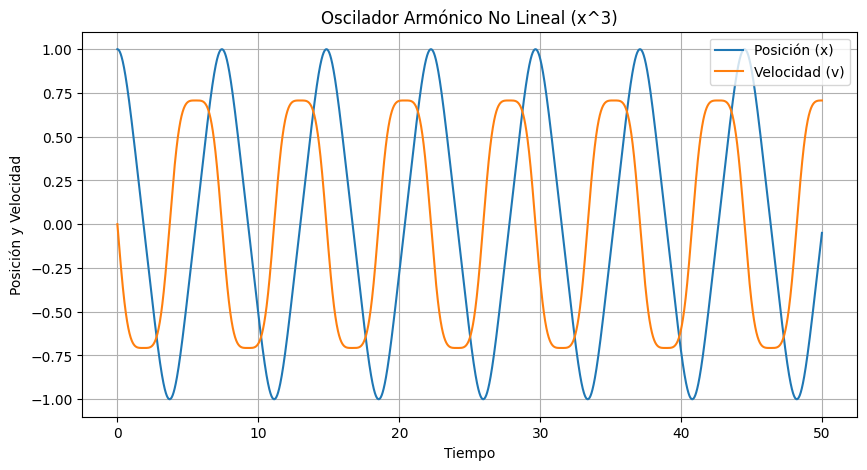

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las constantes del problema
omega_0 = 1.0  # Frecuencia natural
t_max = 50     # Tiempo máximo
dt = 0.01      # Paso temporal

# Ecuaciones del sistema
def derivatives(state, t):
    x, v = state
    dxdt = v
    dvdt = -omega_0**2 * x**3
    return np.array([dxdt, dvdt])

# Método de Runge-Kutta de 4to orden
def runge_kutta_4(state, t, dt):
    k1 = dt * derivatives(state, t)
    k2 = dt * derivatives(state + 0.5 * k1, t + 0.5 * dt)
    k3 = dt * derivatives(state + 0.5 * k2, t + 0.5 * dt)
    k4 = dt * derivatives(state + k3, t + dt)
    return state + (k1 + 2*k2 + 2*k3 + k4) / 6

# Condiciones iniciales
x0 = 1.0  # Posición inicial
v0 = 0.0  # Velocidad inicial
state = np.array([x0, v0])

# Crear arreglos para almacenar los resultados
time = np.arange(0, t_max, dt)
solution = np.zeros((len(time), 2))  # Para almacenar x y v
solution[0] = state

# Iterar usando el método de Runge-Kutta
for i in range(1, len(time)):
    state = runge_kutta_4(state, time[i], dt)
    solution[i] = state

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(time, solution[:, 0], label='Posición (x)')
plt.plot(time, solution[:, 1], label='Velocidad (v)')
plt.title('Oscilador Armónico No Lineal (x^3)')
plt.xlabel('Tiempo')
plt.ylabel('Posición y Velocidad')
plt.legend()
plt.grid(True)
plt.show()
